电商18 180412126 王佳琦

## 1.导入数据

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize  还原被归一化的数据
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))    #
    plt.show()

## 2. 模糊化处理

选取一张图片做卷积运算

pytorch中的卷积运算主要通过torch.nn.Conv2d实现，参考官方文档https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
和博文“pytorch-自定义5×5卷积核对图片的模糊化操作”https://blog.csdn.net/qq_19950851/article/details/106669276

(978, 1024, 3)


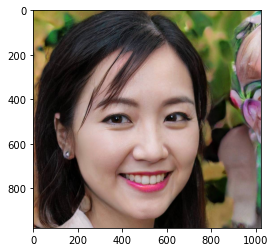

In [3]:
# 读取一张图片并进行展示
pic=plt.imread('images/sample.jpg')
plt.imshow(pic)
print(pic.shape)           

In [4]:
kernel2 = np.ones([5,5])*(1/25)
kernel2 = torch.FloatTensor(kernel2).expand(3,1,5,5)
weight2 = torch.nn.Parameter(data=kernel2, requires_grad=False)
print(weight2.shape)

torch.Size([3, 1, 5, 5])


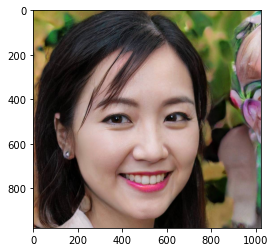

In [5]:
tensor_pic=torch.tensor(pic,dtype=torch.float32)/255 #将numpy类型的pic转为pytorch的张量类型   这里还将其数值转为torch.float32的类型，因为原本的pic数值类型为uint8，pytorch的conv2d函数并不支持
plt.imshow(tensor_pic)   
plt.show()

图片的数值类型是int类型的话，则数值范围应该在0~255之间
图片的数值类型是float类型的话，则数值范围应该在0~1之间
这里由于我们已经将张量类型转为float32了。所以张量的范围也应该在0~1之间，因此需要除以255

In [6]:
picblur=torch.nn.functional.conv2d(tensor_pic.permute(2,0,1).unsqueeze(0),weight2,groups=3)  

conv2d对图片的处理维度是（图片数，通道数，宽，长），因此我们这里需要试用permute对图片的维度进行转换从（宽，长，通道数）转为（通道数，宽，长），并使用unsqueeze增加在dim=0处增加一个维度，变成（图片数，通道数，宽，长）
group表示了是否将3个通道计算出来的值进行累加，我们这里设置为3，表示单独对3个通道单独进行处理。

torch.Size([1, 3, 974, 1020])


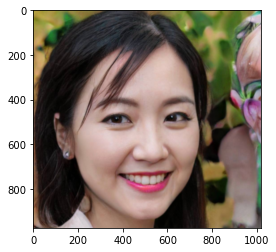

In [7]:
print(picblur.shape)

plt.imshow(picblur.squeeze(0).permute(1,2,0))

## 3. 单位脉冲和

进行上面的操作后，可以仿照相应的步骤试验一下ppt上的各种卷积运算。

In [8]:
kernel3 = np.ones([5,5])*0    #定义卷积核
kernel3

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [9]:
kernel3[2][2]=1
kernel3

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [10]:
kernel3 = torch.FloatTensor(kernel3).expand(3,1,5,5)
weight3 = torch.nn.Parameter(data=kernel3, requires_grad=False)
print(weight3.shape)

torch.Size([3, 1, 5, 5])


In [11]:
picsame=torch.nn.functional.conv2d(tensor_pic.permute(2,0,1).unsqueeze(0),weight3,groups=3)  

torch.Size([1, 3, 974, 1020])


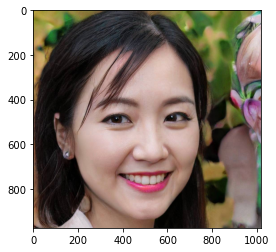

In [12]:
print(picsame.shape)

plt.imshow(picsame.squeeze(0).permute(1,2,0))

## 4.图像平移

In [13]:
kernel4 = np.ones([5,5])*0    #定义卷积核
kernel4

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [14]:
kernel4[2][4]=1
kernel4

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [15]:
kernel4 = torch.FloatTensor(kernel4).expand(3,1,5,5)
weight4 = torch.nn.Parameter(data=kernel4, requires_grad=False)
print(weight4.shape)

torch.Size([3, 1, 5, 5])


In [16]:
picleft=torch.nn.functional.conv2d(tensor_pic.permute(2,0,1).unsqueeze(0),weight4,groups=3)  

torch.Size([1, 3, 974, 1020])


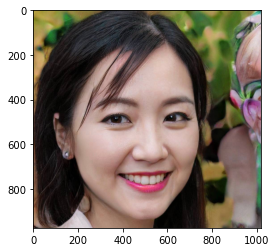

In [17]:
print(picleft.shape)

plt.imshow(picleft.squeeze(0).permute(1,2,0))

这样只平移一个单位看不出区别，用循坏多做几次。

In [18]:
for i in range(0,100):
    picleft=torch.nn.functional.conv2d(picleft,weight4,groups=3)  

torch.Size([1, 3, 574, 620])


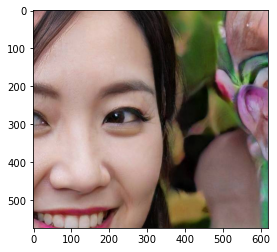

In [19]:
print(picleft.shape)

plt.imshow(picleft.squeeze(0).permute(1,2,0))

平移是平移了，怎么感觉是往右上角？

## 5.锐化

In [21]:
picdetail=picsame-picblur   #原图-平滑=细节

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 974, 1020])


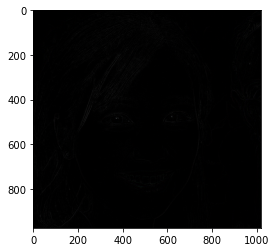

In [22]:
print(picdetail.shape)

plt.imshow(picdetail.squeeze(0).permute(1,2,0))

In [23]:
picsharp=picdetail+picsame   #细节+原图=锐化

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 974, 1020])


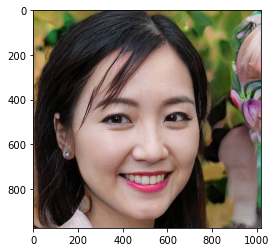

In [24]:
print(picsharp.shape)

plt.imshow(picsharp.squeeze(0).permute(1,2,0))

## 6.其他

In [34]:
kernel5 = np.ones([10,10])*0    #定义卷积核
kernel5

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [35]:
kernel5[2]=1
kernel5

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [36]:
kernel5 = torch.FloatTensor(kernel5).expand(3,1,10,10)
weight5 = torch.nn.Parameter(data=kernel5, requires_grad=False)
print(weight5.shape)

torch.Size([3, 1, 10, 10])


In [37]:
pic2=torch.nn.functional.conv2d(tensor_pic.permute(2,0,1).unsqueeze(0),weight5,groups=3)  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 969, 1015])


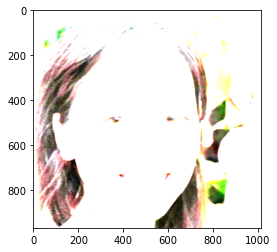

In [38]:
print(pic2.shape)

plt.imshow(pic2.squeeze(0).permute(1,2,0))

## 7. 高斯卷积和

In [53]:
kernel6 =[[0.00078633, 0.00655965, 0.01330373, 0.00655965, 0.00078633],
                  [0.00655965, 0.05472157, 0.11098164, 0.05472157, 0.00655965],
                  [0.01330373, 0.11098164, 0.22508352, 0.11098164, 0.01330373],
                  [0.00655965, 0.05472157, 0.11098164, 0.05472157, 0.00655965],
                  [0.00078633, 0.00655965, 0.01330373, 0.00655965, 0.00078633]]   #定义卷积核
kernel6

[[0.00078633, 0.00655965, 0.01330373, 0.00655965, 0.00078633],
 [0.00655965, 0.05472157, 0.11098164, 0.05472157, 0.00655965],
 [0.01330373, 0.11098164, 0.22508352, 0.11098164, 0.01330373],
 [0.00655965, 0.05472157, 0.11098164, 0.05472157, 0.00655965],
 [0.00078633, 0.00655965, 0.01330373, 0.00655965, 0.00078633]]

In [54]:
kernel6 = torch.FloatTensor(kernel6).expand(3,1,5,5)
weight6 = torch.nn.Parameter(data=kernel6, requires_grad=False)
print(weight6.shape)

torch.Size([3, 1, 5, 5])


In [55]:
picgau=torch.nn.functional.conv2d(tensor_pic.permute(2,0,1).unsqueeze(0),weight6,groups=3)  

torch.Size([1, 3, 974, 1020])


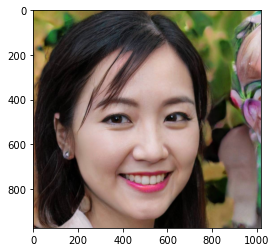

In [56]:
print(picgau.shape)

plt.imshow(picgau.squeeze(0).permute(1,2,0))

的确有模糊的效果。事实证明，美女不需要美颜！